# Honors Proejct - Student Stress Levels

#### Lalitha Hasa Perakam - LalithaHasaP

Question Addressed: What are the factors contributing to student stress levels? 

In [39]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

In [22]:
# read data
data = pd.read_csv('StressLevelDataset.csv')

In [3]:
data.head()

,anxiety_level,self_esteem,mental_health_history,depression,headache,blood_pressure,sleep_quality,breathing_problem,noise_level,living_conditions,...,basic_needs,academic_performance,study_load,teacher_student_relationship,future_career_concerns,social_support,peer_pressure,extracurricular_activities,bullying,stress_level
0,14,20,0,11,2,1,2,4,2,3,...,2,3,2,3,3,2,3,3,2,1
1,15,8,1,15,5,3,1,4,3,1,...,2,1,4,1,5,1,4,5,5,2
2,12,18,1,14,2,1,2,2,2,2,...,2,2,3,3,2,2,3,2,2,1
3,16,12,1,15,4,3,1,3,4,2,...,2,2,4,1,4,1,4,4,5,2
4,16,28,0,7,2,3,5,1,3,2,...,3,4,3,1,2,1,5,0,5,1


This dataset contains 20 features that have the most impact on a student's stress. This dataset has been compiled from a combination of online and offline surveys from high school and college students in Tribhuvan University, Nepal.

#### Psychological Factors => Anxiety Level, Self Esteem, Mental Health History, Depression

#### Physiological Factors => Headache, Blood pressure, Sleep Quality, Breathing Problem

#### Environmental Factors => Noise Level, Living Conditions, Safety, Basic Needs

#### Academic Factors => Academic Performance, Study Load, Teacher-Student Relationship, Future Career Concerns

#### Social Factor => Social Support, Peer Pressure, Extracurricular Activities, Bullying

1) Anxiety : range from 0 to 21, Measure : GAD-7
2) Self-esteem : range 0 to 30, Measure: Rosenberg Self Esteem Scale
3) Mental Health History : 0 if no mental health history, 1 if mental health history
4) Depression : range 0 to 27, Measure: Patient Health Questionnaire (PHQ-9)
5) Other features mostly range from 0 to 5 considering 0,1 to be low, 2,3 to be mid, and 4,5 to be high.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1100 entries, 0 to 1099
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   anxiety_level                 1100 non-null   int64
 1   self_esteem                   1100 non-null   int64
 2   mental_health_history         1100 non-null   int64
 3   depression                    1100 non-null   int64
 4   headache                      1100 non-null   int64
 5   blood_pressure                1100 non-null   int64
 6   sleep_quality                 1100 non-null   int64
 7   breathing_problem             1100 non-null   int64
 8   noise_level                   1100 non-null   int64
 9   living_conditions             1100 non-null   int64
 10  safety                        1100 non-null   int64
 11  basic_needs                   1100 non-null   int64
 12  academic_performance          1100 non-null   int64
 13  study_load                    110

In [5]:
data.isna().any()

anxiety_level                   False
self_esteem                     False
mental_health_history           False
depression                      False
headache                        False
blood_pressure                  False
sleep_quality                   False
breathing_problem               False
noise_level                     False
living_conditions               False
safety                          False
basic_needs                     False
academic_performance            False
study_load                      False
teacher_student_relationship    False
future_career_concerns          False
social_support                  False
peer_pressure                   False
extracurricular_activities      False
bullying                        False
stress_level                    False
dtype: bool

<Figure size 1500x1000 with 0 Axes>

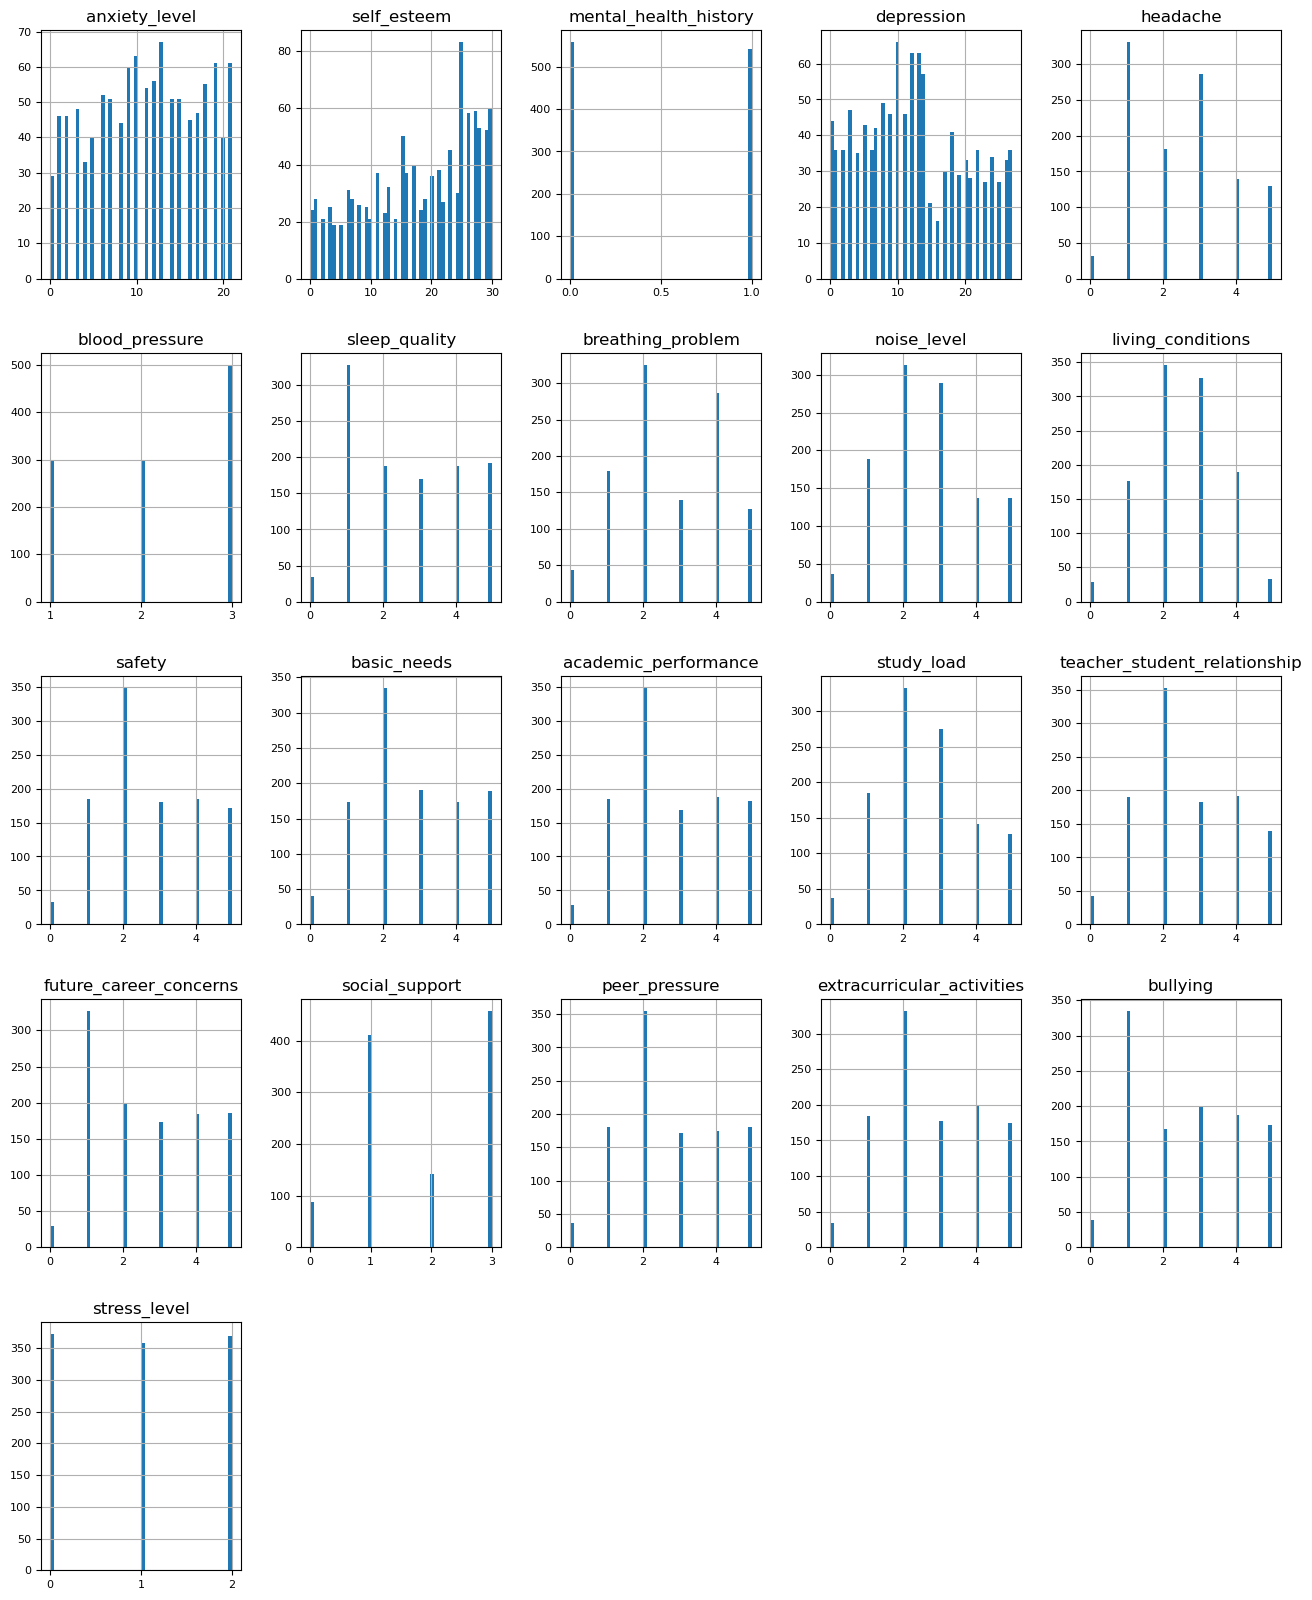

In [23]:
# distribution of all the features

plt.figure(figsize=(15, 10))
data.hist(figsize=(16, 20), bins=50, xlabelsize=8, ylabelsize=8)
plt.title('Numerical Features Distribution')
plt.show()

In [7]:
corr = data.corr()

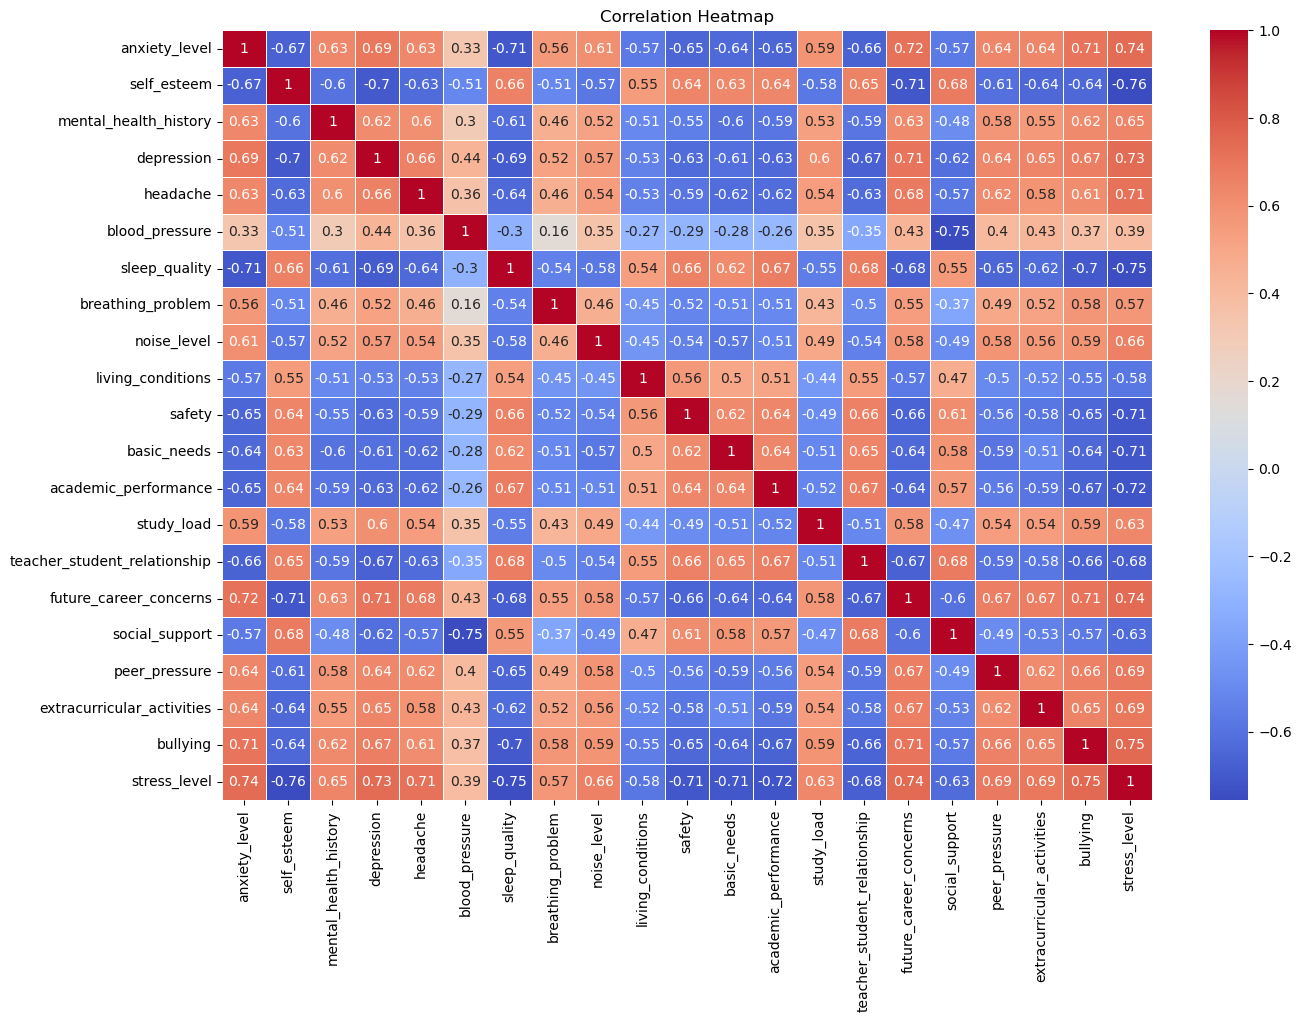

In [8]:
# Heatmap of correlations
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap='coolwarm', annot=True, linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

## Multiple Regression categorized by factors

In [32]:
# dictionary of factors
factors = {'psychological': ['anxiety_level', 'self_esteem', 'mental_health_history', 'depression'],
          'physiological': ['headache', 'blood_pressure', 'sleep_quality', 'breathing_problem'], 
          'environmental': [ 'noise_level', 'living_conditions', 'safety', 'basic_needs'], 
          'academic': ['academic_performance', 'study_load', 'teacher_student_relationship', 'future_career_concerns'],
          'social': [ 'social_support', 'peer_pressure', 'extracurricular_activities', 'bullying']}

# target data
ML_y = data['stress_level']

In [38]:
def linear_regression_train(X_train, y_train, X_test, y_test):
    """
    Perform Multiple Linear Regression and calculate R-squared.

    Parameters:
    X_train (DataFrame): Training set features.
    y_train (Series): Training set target.
    X_test (DataFrame): Testing set features.
    y_test (Series): Testing set target.

    Returns:
    LinearRegression: Trained Linear Regression model.
    """
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    
    print("R-squared (Linear Regression):", round(r_squared, 3))
    
    return model

def ML_plot(model, X_test, y_test, feature_names):
    """
    Plot residuals and feature importance for a Linear Regression model.

    Parameters:
    model (LinearRegression): Trained Linear Regression model.
    X_test (DataFrame): Testing set features.
    y_test (Series): Testing set target.
    feature_names (list): List of feature names.
    """
    # Calculate residuals
    residuals = y_test - model.predict(X_test)

    # Plot residuals and feature importance as subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Residuals plot
    sns.residplot(x=model.predict(X_test), y=residuals, lowess=True, ax=axes[0], color='#e26952')
    #axes[0].hist(residuals, bins=20, color='green', edgecolor='black')
    axes[0].set_title("Residuals vs Fitted")
    axes[0].set_xlabel("Fitted values")
    axes[0].set_ylabel("Residuals")

    # Feature importance plot
    coef = model.coef_
    sorted_idx = coef.argsort()
    sns.barplot(x=coef[sorted_idx], y=[feature_names[i] for i in sorted_idx], ax=axes[1], palette='coolwarm')
    
    axes[1].set_xlabel("Coefficient")
    axes[1].set_ylabel("Feature")
    axes[1].set_title("Feature Coefficients")

    plt.tight_layout()
    plt.show()

R-squared (Linear Regression): 0.764
Category: psychological


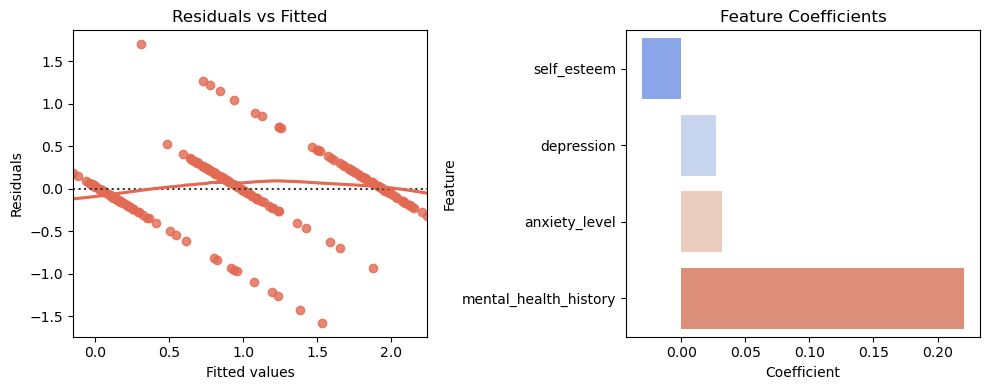




R-squared (Linear Regression): 0.772
Category: physiological


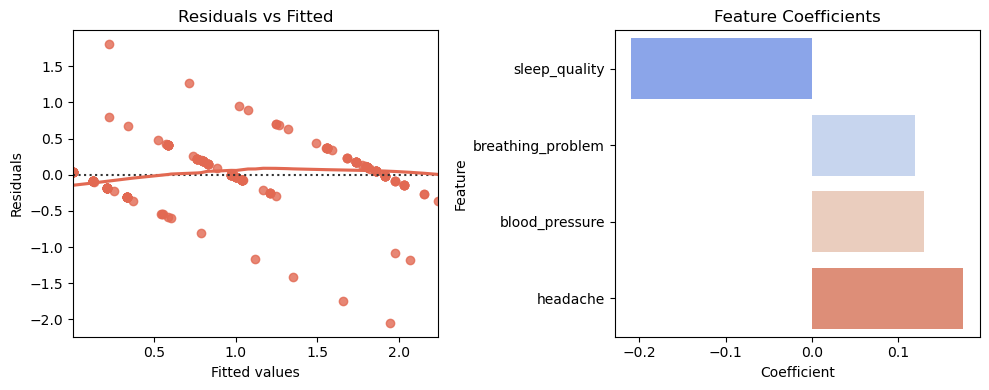




R-squared (Linear Regression): 0.672
Category: environmental


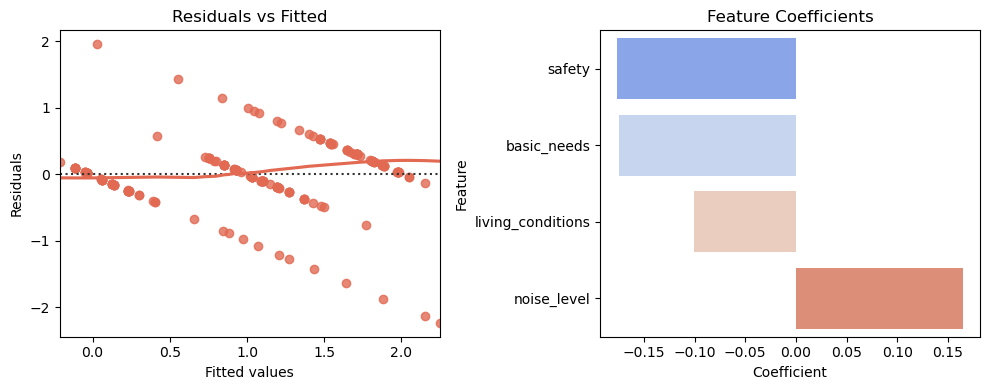




R-squared (Linear Regression): 0.71
Category: academic


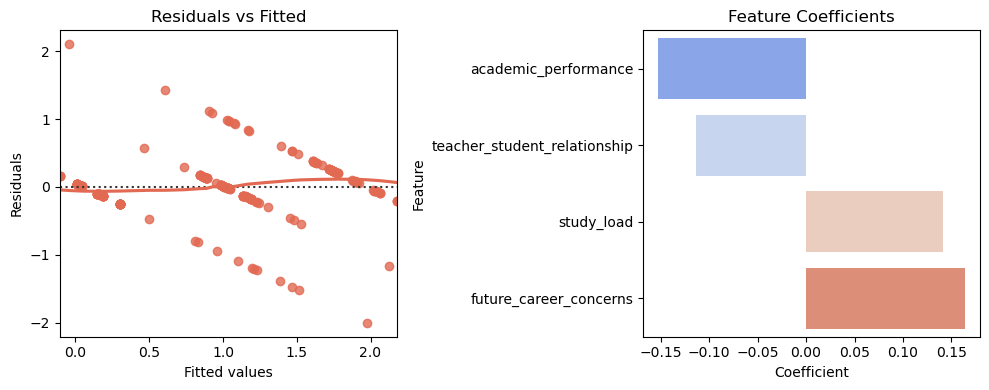




R-squared (Linear Regression): 0.676
Category: social


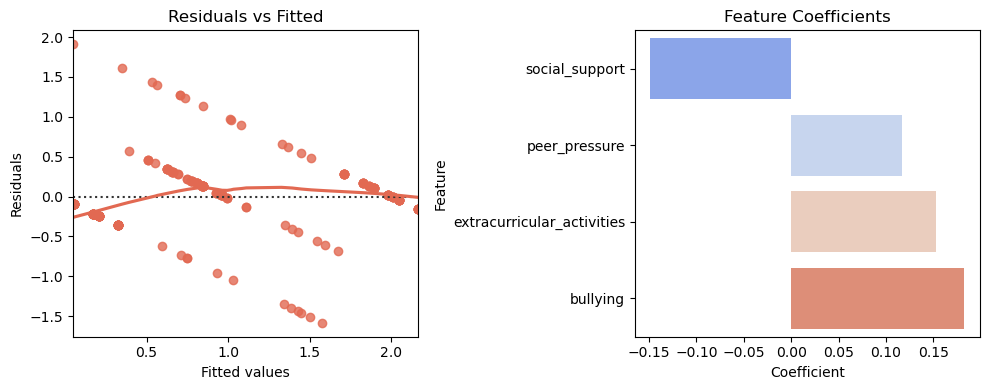

In [34]:
for category, factor_list in factors.items():
    # Select features for the current category
    ML_X = data[factor_list]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(ML_X, ML_y, test_size=0.2, random_state=42)

    # Train the Linear Regression model
    model_lr = linear_regression_train(X_train, y_train, X_test, y_test)

    # Plot residuals and feature importance
    print(f"Category: {category}")
    ML_plot(model_lr, X_test, y_test, factor_list)
    print("\n\n")


## Random Forest Regressor for each Category

In [35]:
def random_forest_train(X_train, y_train, X_test, y_test):
    """
    Perform Random Forest Regression and calculate R-squared.

    Parameters:
    X_train (DataFrame): Training set features.
    y_train (Series): Training set target.
    X_test (DataFrame): Testing set features.
    y_test (Series): Testing set target.

    Returns:
    RandomForestRegressor: Trained Random Forest model.
    """
    model = RandomForestRegressor(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    
    print("R-squared (Random Forest):", round(r_squared, 3))
    
    return model

def RFR_plot(model, X_test, y_test, feature_names):
    """
    Plot residuals and feature importance for a Random Forest model.

    Parameters:
    model (RandomForestRegressor): Trained Random Forest model.
    X_test (DataFrame): Testing set features.
    y_test (Series): Testing set target.
    feature_names (list): List of feature names.
    """
    # Calculate residuals
    residuals = y_test - model.predict(X_test)

    # Plot residuals and feature importance as subplots
    fig, axes = plt.subplots(1, 2, figsize=(10, 4))

    # Residuals plot
    sns.residplot(x=model.predict(X_test), y=residuals, lowess=True, ax=axes[0], color='#e26952')
    #axes[0].hist(residuals, bins=20, color='green', edgecolor='black')
    axes[0].set_title("Residuals vs Fitted")
    axes[0].set_xlabel("Fitted values")
    axes[0].set_ylabel("Residuals")

    # Feature importance plot
    feature_importance = model.feature_importances_
    sorted_idx = feature_importance.argsort()
    sns.barplot(x=feature_importance[sorted_idx], y=[feature_names[i] for i in sorted_idx], ax=axes[1], palette='coolwarm')
    
    axes[1].set_xlabel("Feature Importance")
    axes[1].set_ylabel("Feature")
    axes[1].set_title("Feature Importance")

    plt.tight_layout()
    plt.show()

Category: psychological
R-squared (Random Forest): 0.782


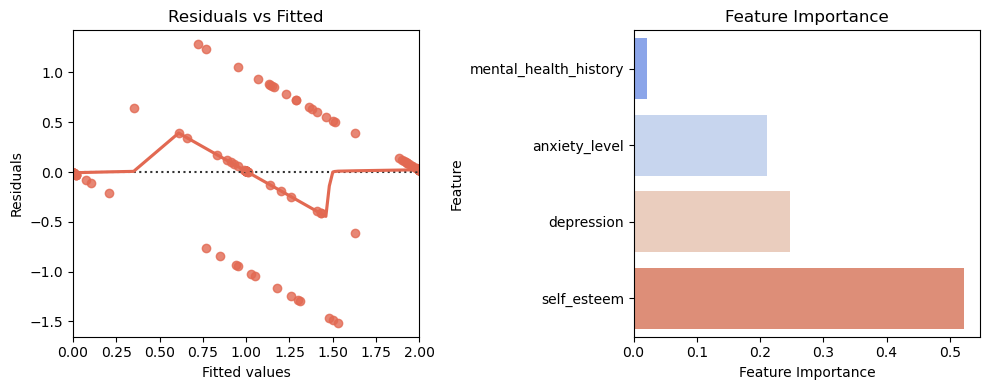




Category: physiological
R-squared (Random Forest): 0.616


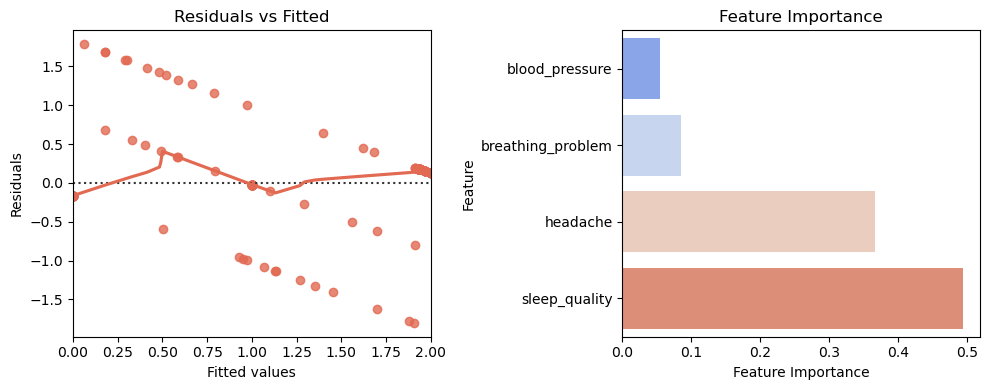




Category: environmental
R-squared (Random Forest): 0.681


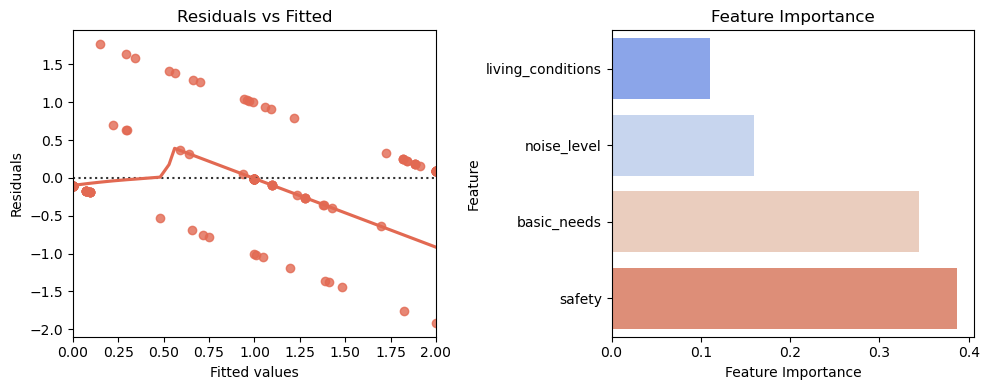




Category: academic
R-squared (Random Forest): 0.754


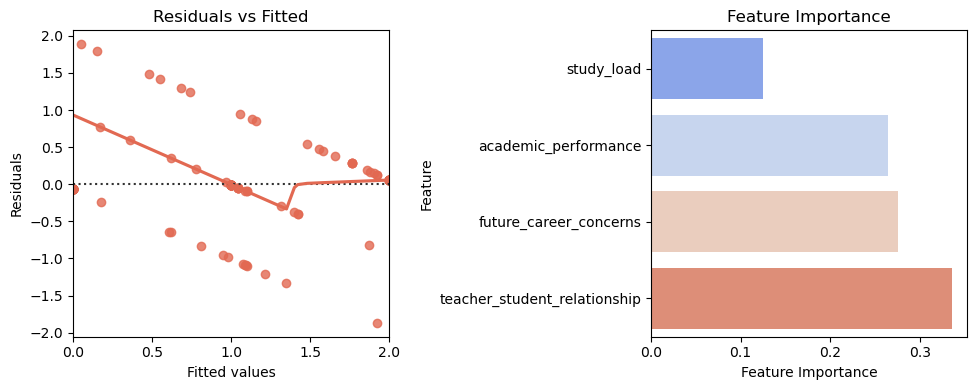




Category: social
R-squared (Random Forest): 0.761


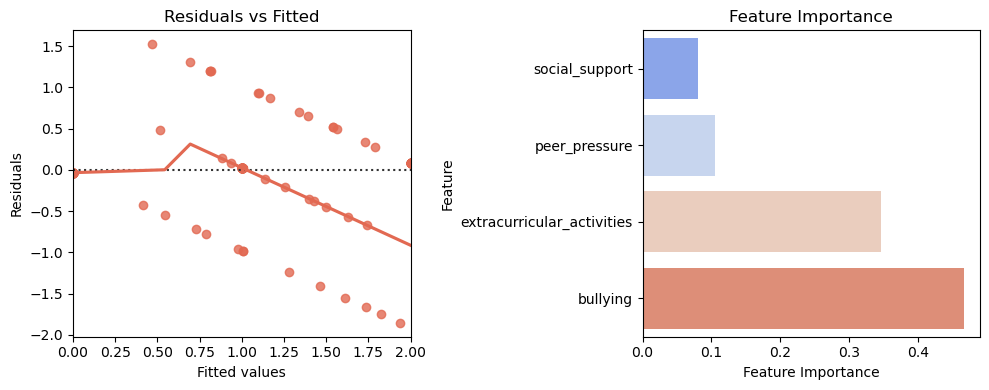

In [15]:
for category, factor_list in factors.items():
    # Select features for the current category
    ML_X = data[factor_list]

    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(ML_X, ML_y, test_size=0.2, random_state=42)

    

    # Plot residuals and feature importance
    print(f"Category: {category}")
    # Train the Random Forest model
    model_rf = random_forest_train(X_train, y_train, X_test, y_test)
    
    RFR_plot(model_rf, X_test, y_test, factor_list)
    print("\n\n")


The top most features affecting stress levels from each category are Self Esteem, Sleep Quality, Safety, Teacher-Student Relationship, Bullying

## Top Features Random Forest Rgression

R-squared (Random Forest): 0.801


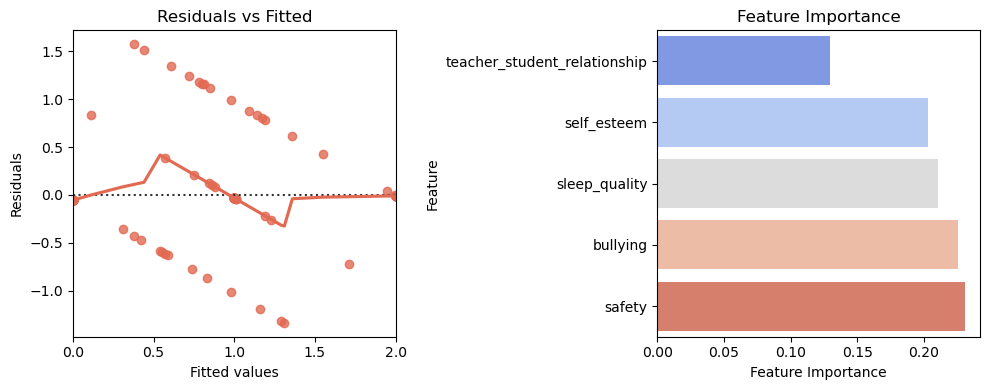

In [40]:
top_features = ['self_esteem', 'sleep_quality', 'safety', 'teacher_student_relationship', 'bullying']

top_X = data[top_features]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(top_X, ML_y, test_size=0.2, random_state=42)

# Train the Random Forest model
model_rf_top = random_forest_train(X_train, y_train, X_test, y_test)

RFR_plot(model_rf_top, X_test, y_test, top_features)

### Function to Predict Stress Levels

In [36]:
factor_names = ['self_esteem', 'sleep_quality', 'safety', 'teacher_student_relationship', 'bullying']

# Initialize dictionary to store user input
user_input = {}

# Ask user for input for each factor
for name in factor_names:
    if name == 'self_esteem':
        while True:
            try:
                rating = int(input("Please enter your rating (0-30) for self-esteem based on the Rosenberg Self-Esteem Scale: "))
                if rating < 0 or rating > 30:
                    print("Rating should be between 0 and 30.")
                    continue
                user_input[name] = rating
                break
            except ValueError:
                print("Please enter a valid integer.")
    else:
        while True:
            try:
                rating = int(input(f"Please enter your rating (0-5) for {name}: "))
                if rating < 0 or rating > 5:
                    print("Rating should be between 0 and 5.")
                    continue
                user_input[name] = rating
                break
            except ValueError:
                print("Please enter a valid integer.")

# Preprocess user input to match the model's input format
input_array = np.array([user_input[name] for name in factor_names]).reshape(1, -1)

# Predict the stress score
stress_score = model_rf_top.predict(input_array)[0]

# Interpret the self-esteem score
self_esteem_score = user_input['self_esteem']
#self_esteem_interpretation = "within normal range" if 15 <= self_esteem_score <= 25 else "suggests low self-esteem"

# Round the stress score and print
predicted_stress_score = int(round(stress_score))
print("Predicted Stress Score:", predicted_stress_score)
#print("Self-Esteem Score Interpretation:", self_esteem_interpretation)


Please enter your rating (0-30) for self-esteem based on the Rosenberg Self-Esteem Scale:  3
Please enter your rating (0-5) for sleep_quality:  0
Please enter your rating (0-5) for safety:  0
Please enter your rating (0-5) for teacher_student_relationship:  0
Please enter your rating (0-5) for bullying:  0


Predicted Stress Score: 1


Sources:
https://www.kaggle.com/datasets/rxnach/student-stress-factors-a-comprehensive-analysis/data
